In [9]:
pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.7/781.7 kB 43.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 15.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install swifter


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 59.9 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16559 sha256=d1882052a6c13af749e339d81360a8797a2e7a14b2d6102874ff225590d08957
  Stored in directory: /home/jupyter/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install spacy 


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.5/31.5 MB 100.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 795.1/795.1 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 117.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
!pip install negspacy


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for negspacy: filename=negspacy-1.0.4-py3-none-any.whl size=12631 sha256=c0d07d868364ad71ea4ecde54d8abec626ed1f090d2c68e40ac0ae101804807b
  Stored in directory: /home/jupyter/.cache/pip/wheels/15/31/f0/3a217aaedf320e4df653347cd6538f3648263b864c8e140853
Successfully built negspacy


In [18]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 104.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import nltk
from tqdm import tqdm
tqdm.pandas()  

from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

import re
import emoji
import multiprocessing

from multiprocessing import Pool

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os
import warnings


os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings('ignore')

import tensorflow as tf


In [5]:
!gcloud config set project ml-projects-460616 

Updated property [core/project].


In [3]:
import os
from google.cloud import storage

In [15]:
from google.cloud import storage
import os

bucket_name="yelp-sentiment-analysis"
csv_file="Sentiment_Data.csv"


local_dir = "./Twitter_sentiment_data"
os.makedirs(local_dir, exist_ok=True)

client = storage.Client()
bucket = client.bucket(bucket_name)


blob = bucket.blob("Sentiment_Data.csv")
local_path = os.path.join(local_dir, "Sentiment_Data.csv")
blob.download_to_filename(local_path)
print(f"Downloaded to {local_path}")


Downloaded to ./Twitter_sentiment_data/Sentiment_Data.csv


In [7]:
tweets = pd.read_csv("Twitter_sentiment_data/Sentiment_Data.csv", encoding="ISO-8859-1")


In [36]:
tweets.head()

,Tweet,Sentiment
0,@_angelica_toy Happy Anniversary!!!....The Day...,Mild_Pos
1,@McfarlaneGlenda Happy Anniversary!!!....The D...,Mild_Pos
2,@thevivafrei @JustinTrudeau Happy Anniversary!...,Mild_Pos
3,@NChartierET Happy Anniversary!!!....The Day t...,Mild_Pos
4,@tabithapeters05 Happy Anniversary!!!....The D...,Mild_Pos


In [37]:
tweets.shape

(451332, 2)

In [38]:
tweets['Sentiment'].value_counts()

Sentiment
Strong_Pos    233700
Neutral        77016
Mild_Pos       64004
Strong_Neg     42556
Mild_Neg       34056
Name: count, dtype: int64

# Removing duplicate tweets

In [6]:
sum(tweets.duplicated())

36

In [8]:
tweets.drop_duplicates(inplace=True)
sum(tweets.duplicated())


0

# Removing null tweets

In [46]:
tweets.isnull().sum()

Tweet        1
Sentiment    0
dtype: int64

In [9]:
# Removing rows where Tweet is null
tweets = tweets.dropna(subset=['Tweet']).reset_index(drop=True)
print("Remaining rows:", len(tweets))



Remaining rows: 451295


In [9]:
tweets.isnull().sum()

Tweet        0
Sentiment    0
dtype: int64

# Sampling

I am comnining mild positive to positive and taking 20k from mild positive to be able to separate from others and 10k from strong positive. Similarly for negative class as well. Finally, I am combining them to classify them into only 3 classes which are positive, negative, and neutral. This will be easy to develop. Later on, we will predict on 5 classes for more detailed.

In [10]:
# Sampling
mild_pos = tweets[tweets['Sentiment'] == 'Mild_Pos'].sample(n=20000, random_state=42)
strong_pos = tweets[tweets['Sentiment'] == 'Strong_Pos'].sample(n=15000, random_state=42)

mild_neg = tweets[tweets['Sentiment'] == 'Mild_Neg'].sample(n=20000, random_state=42)
strong_neg = tweets[tweets['Sentiment'] == 'Strong_Neg'].sample(n=15000, random_state=42)

neutral = tweets[tweets['Sentiment'] == 'Neutral'].sample(n=35000, random_state=42)

# combing them
sampled_df = pd.concat([mild_pos, strong_pos, mild_neg, strong_neg, neutral], axis=0).reset_index(drop=True)


print(sampled_df['Sentiment'].value_counts())


Sentiment
Neutral       35000
Mild_Pos      20000
Mild_Neg      20000
Strong_Pos    15000
Strong_Neg    15000
Name: count, dtype: int64


In [7]:
sampled_df.head()

,Tweet,Sentiment
0,GoFundMe Rejects Fundraising for Canadian Free...,Mild_Pos
1,Andy Vermaut shares:Tweets Of The Day: Heavily...,Mild_Pos
2,@gddub I can! Freedom reporter Carla Olsen was...,Mild_Pos
3,Iâd rather be a failure in something that I ...,Mild_Pos
4,Alberta politician implies Trudeau was behind ...,Mild_Pos


In [11]:
# combining them to make  3 classes
def simplify_sentiment(sent):
    if sent in ['Mild_Pos', 'Strong_Pos']:
        return 'Positive'
    elif sent in ['Mild_Neg', 'Strong_Neg']:
        return 'Negative'
    else:
        return 'Neutral'

sampled_df['Sentiment'] = sampled_df['Sentiment'].apply(simplify_sentiment)


print(sampled_df['Sentiment'].value_counts())


Sentiment
Positive    35000
Negative    35000
Neutral     35000
Name: count, dtype: int64


In [63]:
sampled_df.head()

,Tweet,Sentiment
0,GoFundMe Rejects Fundraising for Canadian Free...,Positive
1,Andy Vermaut shares:Tweets Of The Day: Heavily...,Positive
2,@gddub I can! Freedom reporter Carla Olsen was...,Positive
3,Iâd rather be a failure in something that I ...,Positive
4,Alberta politician implies Trudeau was behind ...,Positive


# Dictionary of Slang words from Github

In [12]:
slang_dict  = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

# Abbrevations

In [13]:
with open("abbreviations_eng.csv", encoding="ISO-8859-1") as f:
    for i, line in enumerate(f.readlines()[:20]):
        print(f"{i+1}: {line}")


1: no;abbr;long

2: 0;.02;two cents worth

3: 1;";S";Hmm? What did you say?

4: 2;?4U;I have a question for you

5: 3;@TEOTD;At the end of the day

6: 4;^^;read message above

7: 5;^5;High-five

8: 6;^URS;Up yours

9: 7;10M;Ten man  

10: 8;10Q;Thank you

11: 9;10X;Thanks

12: 10;121Ê; One-to-one 

13: 11;14AA41;One for all, and all for one

14: 12;1CE;Once

15: 13;1DR;I wonder

16: 14;1NAM;One in a million

17: 15;1TG, 2TG;  number of items needed for win  

18: 16;1UP;  extra life  

19: 17;2B;To be

20: 18;2dayÊ; Today



In [14]:
# Loading CSV using semicolon delimiter and no header
abb = pd.read_csv("abbreviations_eng.csv", 
                  encoding="ISO-8859-1", 
                  delimiter=";", 
                  header=None, 
                  names=["Index", "abbr", "full"])


abb = abb.drop(columns=["Index"])


print(abb.head())


     abbr                       full
0    abbr                       long
1     .02            two cents worth
2      ;S     Hmm? What did you say?
3     ?4U  I have a question for you
4  @TEOTD      At the end of the day


In [15]:

abbr_dict = dict(
    zip(
        abb['abbr'].astype(str).str.strip(),
        abb['full'].astype(str).str.strip()
    )
)


In [16]:
import re
import emoji
import spacy



def expand_terms(text, mapping_dict):
    count = 0
    for short, expanded in mapping_dict.items():
        pattern = r'\b' + re.escape(short) + r'\b'
        matches = len(re.findall(pattern, text))
        if matches > 0:
            text = re.sub(pattern, expanded, text)
            count += matches
    return text, count

def clean_text(text):
    if not isinstance(text, str):
        return "", 0, 0, 0

    text = text.lower()

    # Emoji handling
    emoji_matches = re.findall(r':[a-z_]+:', emoji.demojize(text))
    emoji_count = len(emoji_matches)
    text = emoji.demojize(text)
    text = text.replace(":", " ").replace("_", " ")

    # Slang handling
    text, slang_count = expand_terms(text, slang_dict)

    # Abbreviation handling
    text, abbr_count = expand_terms(text, abbr_dict)

    # Regex cleaning
    text = re.sub(r"http\S+|www.\S+", "", text)     # URLs
    text = re.sub(r"@\w+", "", text)                # Mentions
    text = re.sub(r"#\w+", "", text)                # Hashtags
    text = re.sub(r"&\w+;", "", text)               # HTML entities
    text = re.sub(r"[^a-z\s]", "", text)            # Non-letter characters
    text = re.sub(r"\s+", " ", text).strip()        # Whitespace

   

    return text, emoji_count, slang_count, abbr_count


In [17]:
from joblib import Parallel, delayed
from tqdm.notebook import tqdm

def parallel_clean_text_joblib(text_list, func, n_jobs=-1):
    results = Parallel(n_jobs=n_jobs)(
        delayed(func)(text) for text in tqdm(text_list)
    )
    return results


In [18]:
def clean_text_chunk(chunk):
    return chunk.apply(clean_text)


In [19]:
# Apply cleaning in parallel using joblib
results = parallel_clean_text_joblib(sampled_df['Tweet'], clean_text)


  0%|          | 0/105000 [00:00<?, ?it/s]

In [20]:
# Unpacking the tuple result into new columns in sampled_df
sampled_df['Clean_Tweet'] = [r[0] for r in results]
sampled_df['Emoji_Count'] = [r[1] for r in results]
sampled_df['Slang_Count'] = [r[2] for r in results]
sampled_df['Abbr_Count'] = [r[3] for r in results]


In [21]:
sampled_df.head()


,Tweet,Sentiment,Clean_Tweet,Emoji_Count,Slang_Count,Abbr_Count
0,Ottawa Police shoot RUBBER BULLETS into crowd ...,Positive,ottawa police shoot rubber bullets into crowd ...,0,0,0
1,A former Mountie and member of Prime Minister ...,Positive,a former mountie and member of prime minister ...,0,0,0
2,@PierrePoilievre Itâs already the freest cou...,Positive,its already the freest country stop trying to ...,0,0,0
3,@RobynUrback Ban ministers from the Very progr...,Positive,ban ministers from the very progressive freedo...,0,0,0
4,Three songs have been stuck in my head the pas...,Positive,three songs have been stuck in my head the pas...,0,0,0


In [54]:
blank_rows = sampled_df[sampled_df['Clean_Tweet'] == ""][['Tweet']]
print("tweets cleaned to empty:")
print(blank_rows)


Examples of tweets cleaned to empty:
                                                                                                                                                                                                                                                                  Tweet
1365    @Bill096409832 @OnlyHumanFolks @freeandwildCA @andremtl123 @KreminLorie @Harmony47383691 @Michael25731595 @IANSFREE @VioletBEscapes @CanuckGTA @Pcuser44 @LouiseN16885681 @shimjelly @CarmenSimone3 @ennerut @NeilGolley @BCprospector @AnnetteMattsMom @Begin4
1726    @jimdtweet @IanDJbrown2 @Canadianworker2 @BubbasRanch @Kenneth72712993 @QuBuBrasil @try2golf @HalBrow68884227 @Data79504085 @borngeek @robhon_ @ponycar06 @Willard1951 @RobMeekel @IngersolRobert @merphie77 @TWTThisIsNow @LunusOfGayTakes @GlennCarr6 @BrknMa
7112    @Shinyside74 @StillNOTSilent1 @traceitback @JTighe1873 @Bill096409832 @MarkLouie357 @2AforCanada @alienmagicman @mrjaybeevee @HSandwich47 @MichaelBator6 @catcameba

# Removing hashtags and mentions for now.

In [55]:
# Dropping rows where Clean_Tweet is empty or null
sampled_df = sampled_df[~sampled_df['Clean_Tweet'].isnull()]  
sampled_df = sampled_df[sampled_df['Clean_Tweet'].str.strip() != ""]  


sampled_df.reset_index(drop=True, inplace=True)


In [56]:
sampled_df.isnull().sum()

Tweet          0
Sentiment      0
Clean_Tweet    0
Emoji_Count    0
Slang_Count    0
Abbr_Count     0
dtype: int64

In [57]:
# import csv

# sampled_df[['Clean_Tweet', 'Sentiment']].to_csv(
#     "Twitter_sentiment_data/processed_data_without_negation.csv",
#     index=False,
#     encoding='utf-8'
# )


In [58]:
data_nonegate=sampled_df.copy()

# Negation handling

In [61]:
import spacy
from tqdm.notebook import tqdm  

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

def handle_negation(text):
    doc = nlp(text)
    negated = {token.head.i for token in doc if token.dep_ == "neg"}

    return " ".join(
        ["NOT_" + token.text if i in negated else token.text for i, token in enumerate(doc)]
    )


tqdm.pandas(desc="Applying negation to Clean_Tweet")


sampled_df["Negated_Tweet"] = sampled_df["Clean_Tweet"].progress_apply(handle_negation)


Applying negation to Clean_Tweet:   0%|          | 0/102807 [00:00<?, ?it/s]

In [62]:
sampled_df.isnull().sum()

Tweet            0
Sentiment        0
Clean_Tweet      0
Emoji_Count      0
Slang_Count      0
Abbr_Count       0
Negated_Tweet    0
dtype: int64

In [64]:
negate_tweets=sampled_df.copy()

In [69]:
sampled_df.to_csv("Twitter_sentiment_data/processed_tweets_with_negation.csv",index=False)

In [97]:
print("Total Emojis Handled:", sampled_df['Emoji_Count'].sum())
print("Total Slangs Handled:", sampled_df['Slang_Count'].sum())
print("Total Abbreviations Handled:", sampled_df['Abbr_Count'].sum())


Total Emojis Handled: 7487
Total Slangs Handled: 7350
Total Abbreviations Handled: 42


In [70]:
# df=pd.read_csv("Twitter_sentiment_data/processed_tweets_with_negation.csv")
# df.head()

,Tweet,Sentiment,Clean_Tweet,Emoji_Count,Slang_Count,Abbr_Count,Negated_Tweet
0,Ottawa Police shoot RUBBER BULLETS into crowd | Freedom Convoy *UPDATE* https://t.co/xf8boG39Eq via @YouTube \n\nIn response the Peaceful Protestors shout SHAME ON YOU at the Police.,Positive,ottawa police shoot rubber bullets into crowd freedom convoy update tcoxfbogeq via in response the peaceful protestors shout shame on you at the police,0,0,0,ottawa police shoot rubber bullets into crowd freedom convoy update tcoxfbogeq via in response the peaceful protestors shout shame on you at the police
1,A former Mountie and member of Prime Minister Justin Trudeau's security team denied an allegation that he may have leaked the prime minister's schedule in the month leading up to the self-styled Freedom Convoy. https://t.co/RuaIQyHnrm,Positive,a former mountie and member of prime minister justin trudeaus security team denied an allegation that he may have leaked the prime ministers schedule in the month leading up to the selfstyled freedom convoy tcoruaiqyhnrm,0,0,0,a former mountie and member of prime minister justin trudeaus security team denied an allegation that he may have leaked the prime ministers schedule in the month leading up to the selfstyled freedom convoy tcoruaiqyhnrm
2,"@PierrePoilievre Itâs already the freest country. Stop trying to fool people into thinking freedom was taken away. You sound ridiculous. Trying to manipulate people from the trucker convoy for votes, however, I have to agree, they are an easy target, Bu",Positive,its already the freest country stop trying to fool people into thinking freedom was taken away you sound ridiculous trying to manipulate people from the trucker convoy for votes however i have to agree they are an easy target bu,0,0,0,its already the freest country stop trying to fool people into thinking freedom was taken away you sound ridiculous trying to manipulate people from the trucker convoy for votes however i have to agree they are an easy target bu
3,@RobynUrback Ban ministers from the Very progressive Freedom convoy too?â¦.hmm,Positive,ban ministers from the very progressive freedom convoy toohmm,0,0,0,ban ministers from the very progressive freedom convoy toohmm
4,"Three songs have been stuck in my head the past few weeks because of the Freedom Convoy 2022. \nFirst ""A Bunch of Yahoos"" by @anonymotif https://t.co/A4euZpOMP9",Positive,three songs have been stuck in my head the past few weeks because of the freedom convoy first a bunch of yahoos by tcoaeuzpomp,0,0,0,three songs have been stuck in my head the past few weeks because of the freedom convoy first a bunch of yahoos by tcoaeuzpomp


In [71]:
df.isnull().sum()

Tweet            0
Sentiment        0
Clean_Tweet      0
Emoji_Count      0
Slang_Count      0
Abbr_Count       0
Negated_Tweet    0
dtype: int64

# Summary of Preprocessing Steps Before Splitting the Data


1. Dataset Sampling:
   - Selected 105,000 tweets:
     - 20k Mild_Pos, 15k Strong_Pos
     - 20k Mild_Neg, 15k Strong_Neg
     - 35k Neutral

2. Cleaning Pipeline:
   - Lowercased all text
   - Emoji Handling:
     - Converted emojis to text using `emoji.demojize`
     - Counted emoji occurrences
   - Slang & Abbreviation Expansion:
     - Used `slang_dict` and `abbr_dict` to expand informal terms
     - Counted replacements
   - Regex Cleaning:
     - Removed URLs, mentions (@), hashtags (#), HTML entities, special characters
     - Normalized whitespace
     
Total Emojis Handled: 7487

Total Slangs Handled: 7350

Total Abbreviations Handled: 42


3. Negation Handling:
   - Used spaCy to identify negated words
   - Prefixed negated tokens with `NOT_`

4. Post-Cleaning Fixes:
   - Detected and removed ~2,100 tweets that became empty after cleaning (which are tweets with hastags and mentions)
   - Final dataset contains only non-empty, clean tweets


In [16]:
sampled_df=pd.read_csv("Twitter_sentiment_data/processed_tweets_with_negation.csv")

# Label Encoding Sentiment column

Negative - 0
Neutral - 1
Positive - 2


In [17]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
sampled_df['Sentiment'] = label_encoder.fit_transform(sampled_df['Sentiment'])


print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


{'Negative': np.int64(0), 'Neutral': np.int64(1), 'Positive': np.int64(2)}


In [18]:
sampled_df.head()

,Tweet,Sentiment,Clean_Tweet,Emoji_Count,Slang_Count,Abbr_Count,Negated_Tweet
0,Ottawa Police shoot RUBBER BULLETS into crowd ...,2,ottawa police shoot rubber bullets into crowd ...,0,0,0,ottawa police shoot rubber bullets into crowd ...
1,A former Mountie and member of Prime Minister ...,2,a former mountie and member of prime minister ...,0,0,0,a former mountie and member of prime minister ...
2,@PierrePoilievre Itâs already the freest cou...,2,its already the freest country stop trying to ...,0,0,0,its already the freest country stop trying to ...
3,@RobynUrback Ban ministers from the Very progr...,2,ban ministers from the very progressive freedo...,0,0,0,ban ministers from the very progressive freedo...
4,Three songs have been stuck in my head the pas...,2,three songs have been stuck in my head the pas...,0,0,0,three songs have been stuck in my head the pas...


# Splitting Data.

In [19]:
from sklearn.model_selection import train_test_split

X = sampled_df['Negated_Tweet']
y = sampled_df['Sentiment']  

# Splitting into train (70%), validation (15%), and test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


print("Training set size   :", len(X_train))
print("Validation set size :", len(X_val))
print("Test set size       :", len(X_test))


Training set size   : 71964
Validation set size : 15421
Test set size       : 15422


# Tokenization and padding

In [20]:


# initialize Tokenizer
vocab_size = 10000  
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")  

# Fittin on training data only
tokenizer.fit_on_texts(X_train)

#Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Determine max length and pad all sequences
maxlen = max([len(seq) for seq in X_train_seq])  
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=maxlen, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post', truncating='post')


print("X_train_pad shape:", X_train_pad.shape)
print("X_val_pad shape  :", X_val_pad.shape)
print("X_test_pad shape :", X_test_pad.shape)


X_train_pad shape: (71964, 62)
X_val_pad shape  : (15421, 62)
X_test_pad shape : (15422, 62)


In [78]:
X_train_pad

array([[ 166, 6741,    4, ...,    0,    0,    0],
       [9962,   11,   20, ...,    0,    0,    0],
       [ 759,    0,    0, ...,    0,    0,    0],
       ...,
       [ 434, 1130,    1, ...,    0,    0,    0],
       [   5,    2,  603, ...,    0,    0,    0],
       [ 106,  709,   99, ...,    0,    0,    0]], dtype=int32)

# Deep Bi-directional GRU - Model 1

In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout

# defining model
embedding_dim = 100
hidden_units = 64

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_shape=(maxlen,)),

    # First Bidirectional GRU layer (returns sequences to stack next layer)
    Bidirectional(GRU(units=hidden_units, return_sequences=True)),
    Dropout(0.3),

    # Second Bidirectional GRU layer
    Bidirectional(GRU(units=hidden_units, return_sequences=False)),
    Dropout(0.3),

    # Dense layers
    Dense(64, activation='relu'),
    Dropout(0.3),

    # Output layer 
    Dense(3, activation='softmax')  # for Positive, Neutral, Negative
])


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])




In [84]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 62, 100)        │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 62, 128)        │        63,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 62, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 128)            │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,146,691 (4.37 MB)

 Trainable params: 1,146,691 (4.37 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [85]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


history = model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_val_pad, y_val),
    callbacks=[early_stop, checkpoint],
    verbose=1
)


Epoch 1/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.5127 - loss: 0.9615

563/563 ━━━━━━━━━━━━━━━━━━━━ 69s 115ms/step - accuracy: 0.5128 - loss: 0.9614 - val_accuracy: 0.6725 - val_loss: 0.7412
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.7144 - loss: 0.6670

563/563 ━━━━━━━━━━━━━━━━━━━━ 64s 114ms/step - accuracy: 0.7144 - loss: 0.6670 - val_accuracy: 0.7094 - val_loss: 0.6744
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.7617 - loss: 0.5618

563/563 ━━━━━━━━━━━━━━━━━━━━ 65s 115ms/step - accuracy: 0.7617 - loss: 0.5618 - val_accuracy: 0.7249 - val_loss: 0.6614
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 64s 114ms/step - accuracy: 0.7921 - loss: 0.4990 - val_accuracy: 0.7102 - val_loss: 0.6971
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 65s 115ms/step - accuracy: 0.8173 - loss: 0.4466 - val_accuracy: 0.7269 - val_loss: 0.6911
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 64s 113ms/step - accuracy: 0.8416 - loss: 0.3985 - val_accuracy: 0.7217 - val_loss: 0.7321


In [91]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc


# results dataframe
results_df_multi = pd.DataFrame(columns=["Set", "Accuracy", "F1_macro", "ROC_AUC_macro"])

def evaluate_multiclass_model(set_name, model, X_pad, y_true, class_names=None):
    global results_df_multi
    
    # Predict probabilities and predicted classes
    y_probs = model.predict(X_pad)
    y_pred = np.argmax(y_probs, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="macro")
    roc_auc = roc_auc_score(y_true, y_probs, multi_class='ovo', average='macro')

    # Update results dataframe
    results_df_multi = pd.concat([
        results_df_multi,
        pd.DataFrame([{
            "Set": set_name,
            "Accuracy": accuracy,
            "F1_macro": f1,
            "ROC_AUC_macro": roc_auc
        }])
    ], ignore_index=True)

    # classification report
    print(f"Classification Report ({set_name}):\n")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Confusion matrix
    print(f"Confusion Matrix ({set_name}):")
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f"{set_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC Curve (One-vs-rest)
    print(f"ROC-AUC Curve ({set_name}):")
    y_true_bin = pd.get_dummies(y_true).values
    plt.figure(figsize=(8, 6))
    for i in range(y_probs.shape[1]):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_probs[:, i])
        auc_score = auc(fpr, tpr)
        label = f"{class_names[i] if class_names else f'Class {i}'} (AUC = {auc_score:.2f})"
        plt.plot(fpr, tpr, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"{set_name} ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return results_df_multi


2249/2249 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step
Classification Report (Training):

              precision    recall  f1-score   support

    Negative       0.76      0.91      0.83     24498
     Neutral       0.88      0.62      0.73     22971
    Positive       0.82      0.88      0.85     24495

    accuracy                           0.81     71964
   macro avg       0.82      0.80      0.80     71964
weighted avg       0.82      0.81      0.80     71964

Confusion Matrix (Training):


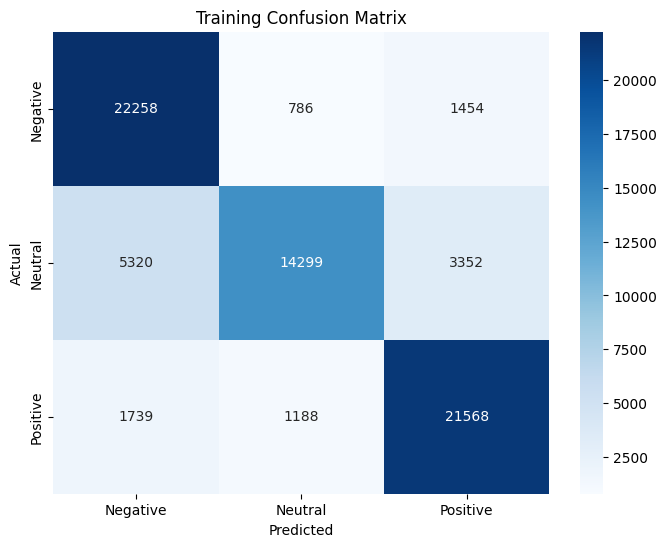

ROC-AUC Curve (Training):


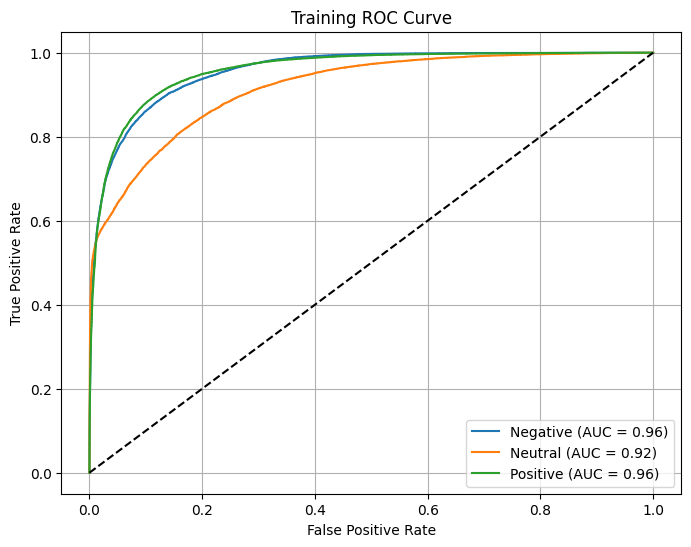

,Set,Accuracy,F1_macro,ROC_AUC_macro
0,Training,0.807696,0.801303,0.943453


In [92]:
evaluate_multiclass_model("Training", model, X_train_pad, y_train, class_names=["Negative", "Neutral", "Positive"])


482/482 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step
Classification Report (Validation):

              precision    recall  f1-score   support

    Negative       0.69      0.84      0.76      5249
     Neutral       0.77      0.55      0.64      4923
    Positive       0.73      0.78      0.75      5249

    accuracy                           0.72     15421
   macro avg       0.73      0.72      0.72     15421
weighted avg       0.73      0.72      0.72     15421

Confusion Matrix (Validation):


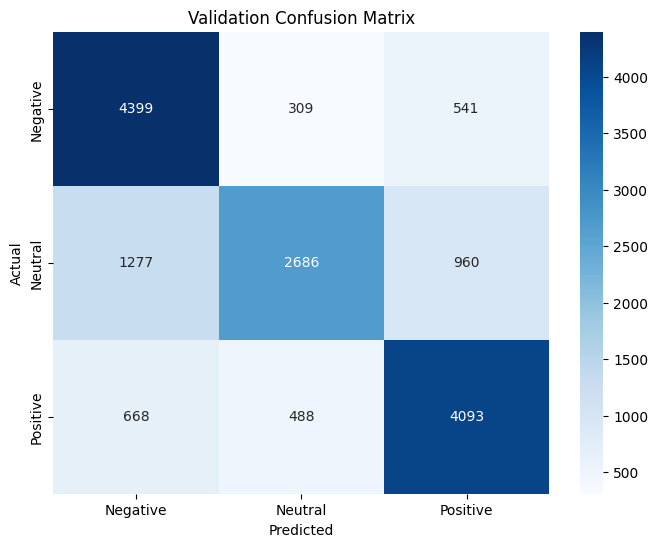

ROC-AUC Curve (Validation):


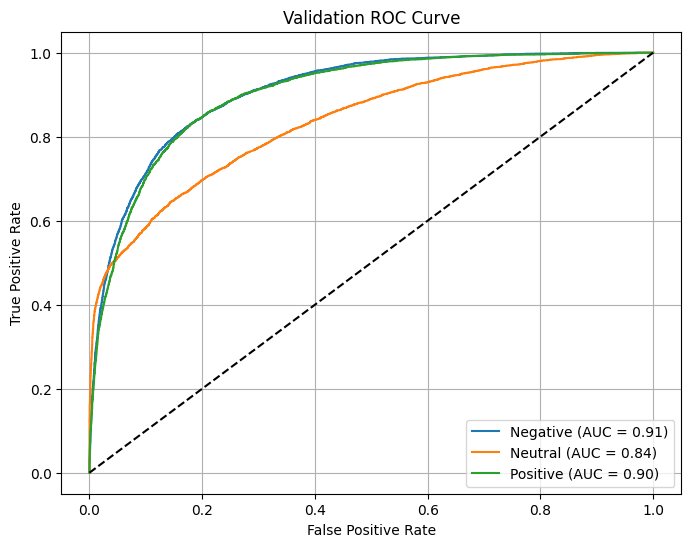

,Set,Accuracy,F1_macro,ROC_AUC_macro
0,Training,0.807696,0.801303,0.943453
1,Validation,0.724856,0.717644,0.881382


In [93]:
evaluate_multiclass_model("Validation", model, X_val_pad, y_val, class_names=["Negative", "Neutral", "Positive"])


In [95]:
# model.save("GRU_model1.keras")


# Observations:

1. Accuracy from training to validation dropped by 8%, indicating slight overfitting. We can play with drop out.
2. Model is struggling to predict class "Neutral". We can try adding more weight to that class.
3. Positive and negative classes have good f1 score of 76%. Can be improved.

# Next steps: Model tuning

1. Reduce Overfitting
- Dropout Increase 
- reducing to 1 BiGRU
- kernel_regularizer=l2 to Dense layer

2. Improving Accuracy

- spell check in pre processing
- Attention layer 
- class weights


| **Metric / Aspect**                   | **Details**                                                                            |
| ------------------------------------- | -------------------------------------------------------------------------------------- |
| **Model Type**                        | Deep Bidirectional GRU                                                                 |
| **Embedding**                         | Keras Embedding (vocab\_size=10,000, embed\_dim=100)                                   |
| **Model Configuration**               | Embedding → BiGRU(64) → Dropout(0.3) → BiGRU(64) → Dense(64, ReLU) → Dense(3, Softmax) |
| **Training Time**                     | 11 minutes (16 cpus, 64gb ram)                |
| **Training Data Checked**             | Cleaned, tokenized, padded, and validated                                            |
| **Confusion Matrix Built?**           | Yes                                                                                  |
| **F1 Score – Positive Class**         | ≈ 0.83                                                                                 |
| **F1 Score – Negative Class**         | ≈ 0.85                                                                                 |
| **ROC AUC Plotted?**                  | Yes (macro & per-class curves)                                                       |
| **AUC Score**                         | ≈ 0.94 (macro average)                                                                 |
| **Accuracy Computed?**                | Yes                                                                                  |
| **Accuracy**                          | ≈ 80%                                                                                   |
| **Categorical / Numerical Features?** | Not yet (only text)                                                                  |
| **2 Suggested Features to Add**       | 1. Tweet Length<br>2. Emoji or punctuation count                                       |




| **#** | **Tuning Area**           | **Description**                                                                                     |
| ----: | ------------------------- | --------------------------------------------------------------------------------------------------- |
|     1 | **Architecture Tuning**   | Changing model layers, type (e.g., GRU → LSTM), number of layers, or connections                    |
|     2 | **Hyperparameter Tuning** | Adjusting learning rate, batch size, dropout rate, number of GRU units, etc.                        |
|     3 | **Regularization**        | Adding dropout layers, early stopping, or L2 regularization to prevent overfitting                  |
|     4 | **Optimizer Choices**     | Trying optimizers like Adam, RMSprop, SGD that affect training efficiency                           |
|     5 | **Embedding Tuning**      | Changing embedding size, using pretrained vectors (GloVe, FastText), or making embeddings trainable |
|     6 | **Data Preprocessing**    | Better text cleaning, handling emojis, stopwords, or fixing class imbalance                         |
|     7 | **Feature Engineering**   | Creating new useful features (e.g., sentiment scores, tweet length)                                 |
|     8 | **Evaluation Strategy**   | Using stratified splits, cross-validation, adjusting decision thresholds                            |


In [24]:
from keras.models import load_model

model = load_model("GRU_model1.keras")


In [25]:
!pip install lime --quiet
from lime.lime_text import LimeTextExplainer



In [26]:
# Your label encoder/decoder
class_names = ['Negative', 'Neutral', 'Positive']  # adjust as per your dataset

# Create prediction wrapper using tokenizer and model
def predict_proba(texts):
    sequences = tokenizer.texts_to_sequences(texts)
    padded = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')
    return model.predict(padded)


In [27]:
explainer = LimeTextExplainer(class_names=class_names)


In [28]:
i = 10  # example index
text_sample = X_test.iloc[i]
exp = explainer.explain_instance(text_sample, predict_proba, num_features=10)
exp.show_in_notebook(text=True)


157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step


In [30]:
from collections import defaultdict
global_weights = defaultdict(float)

# Sample 
for i in range(30):
    exp = explainer.explain_instance(X_test.iloc[i], predict_proba, num_features=10)
    for word, weight in exp.as_list():
        global_weights[word] += abs(weight)

# 
global_df = pd.DataFrame(global_weights.items(), columns=['word', 'importance']).sort_values(by='importance', ascending=False)

# top influential words
global_df.head(20)


157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14

,word,importance
39,freedom,4.713801
106,good,1.014538
10,fascists,1.012511
20,glad,0.729261
0,worried,0.624866
115,wins,0.417767
77,violence,0.354733
28,convoy,0.336353
149,stupid,0.241934
21,inspirational,0.226565


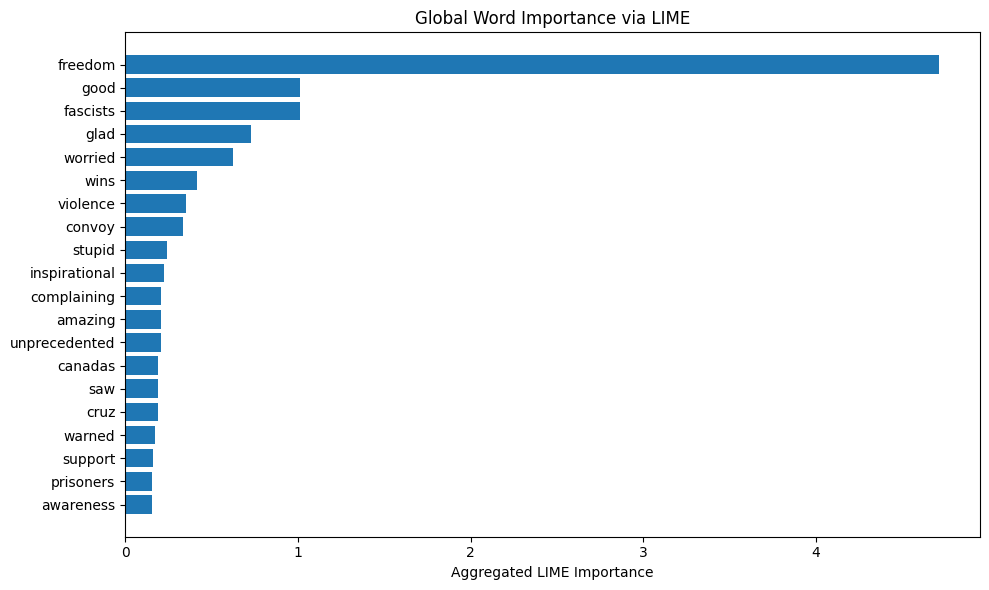

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_words = global_df.head(20)
plt.barh(top_words['word'][::-1], top_words['importance'][::-1])
plt.xlabel('Aggregated LIME Importance')
plt.title('Global Word Importance via LIME')
plt.tight_layout()
plt.show()
